# PELEVS usage example

Here we import all the libraries we are going to need to use

In [1]:
import pelevs

# 1. Prepare receptor and ligands

The first step as always should be preparing the inputs for the library. In this case we need:
1. Protonated receptor at the corresponding pH with PROPKA tool.
2. A csv file with the ligands in SMILES format and with an index to identify the ligands.

In this case the files are located inside original_input/.

Having all the prerequisites we can begin to use the library. First we need the imports


---

In [9]:
receptor_path = 'original_input/gpcr.pdb'
ligands_path = 'original_input/dataset_gpcr.csv'

# Initialize inputPrepare object
input_prepare = pelevs.inputPrepare.InputPreparation(ligands_path,receptor_path)

# Set up a LigPrep job 
input_prepare.setUpLigPrepJob(pH=7.2, pH_tolerance=0.5, conformations=5)

 -     Ligand file is already in 1_input_files/ligands.


---

With the previous code we have generated a Schrödinger job to send to the local machines with license. What is recommended is to compress in a tar the folder 2_ligprep_job/job into job.tar

```tar -cvf job.tar job```

Once decompresed you can just run 

```bash ligprep.sh```

Once the job is finished you can download the job folder entirely to the same directory.
With this we are ready to being the docking.

---

# 2. Docking

To begin the docking we first need to know the docking tool we are going to use. This library is prepared for glide, rdock and equibind. In this case we are going to use glide. 

In order to have a thorough and accurate grid, the zip file should be generated using Maestro. In this case, we coppied the file into original_input/.

In [2]:
grid_path = 'original_input/gpcr_grid.zip'

# We generate a DockingJob object
glide = pelevs.dockingJob.DockingJob()

# We pass the grid file to the method
glide.setGlideDocking(grid_path, output_models=10)

 - Glide job generated successfully with grid original_input/gpcr_grid.zip and forcefield OPLS_2005.


---

Again, with the previous code we have generated a Schrödinger job to send to the local machines with license. What is recommended is to compress in a tar the folder 3_ligprep_job/job into job.tar.

Once decompresed you can just run 

```bash glide_job.sh```

Once the job is finished you can download the job folder entirely to the same directory.
With this we are ready to analyze some results and prepare the PELE simulations.

---

 - Glide docking results found
 - Csv information imported and sorted (self.calculated_data)
 - Correlation image generated succesfully
 - Molecular weight plots generated succesfully.
 - Images stored at 3_docking_job/images

 - Time distribution figure plotted correctly.


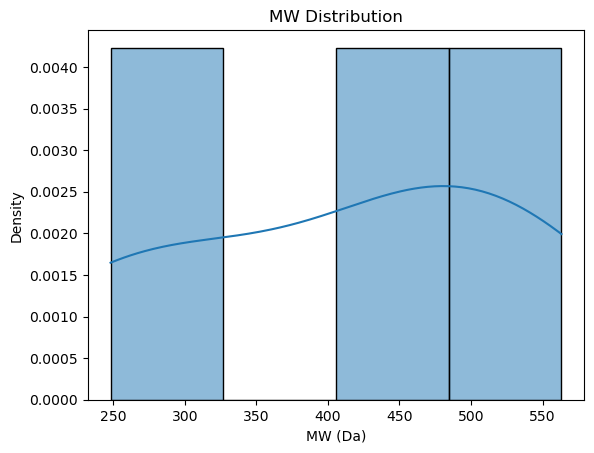

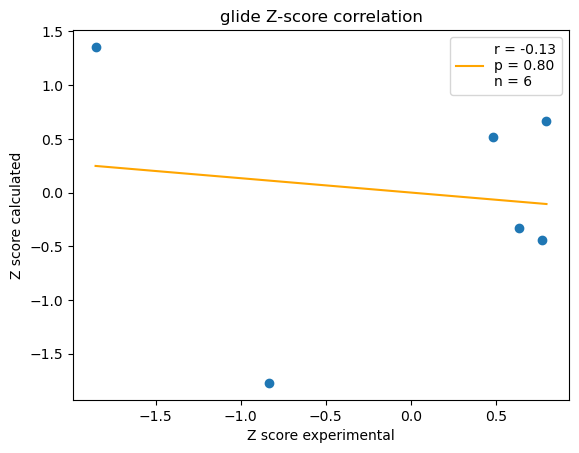

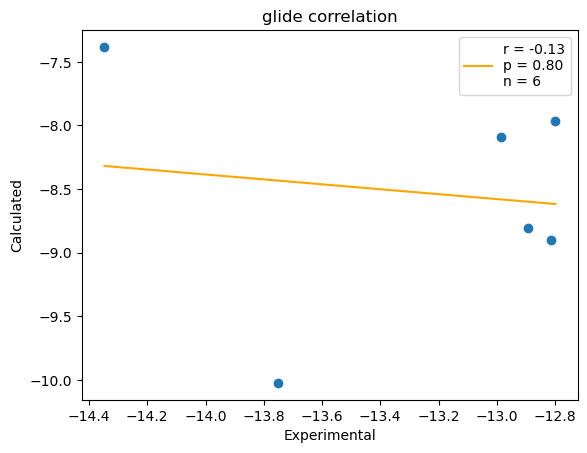

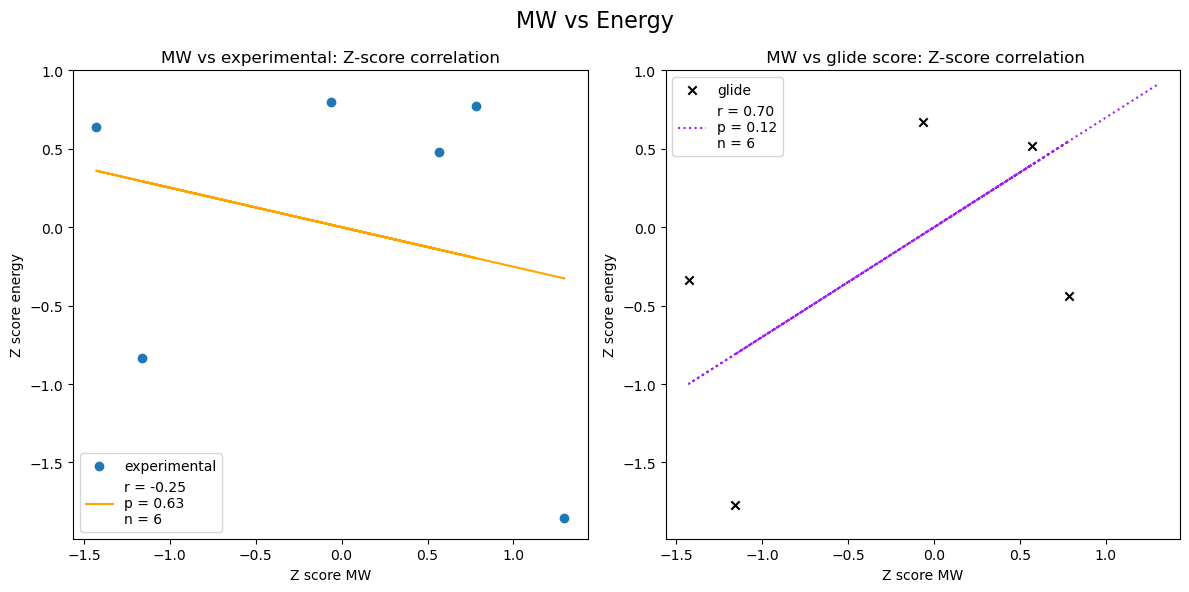

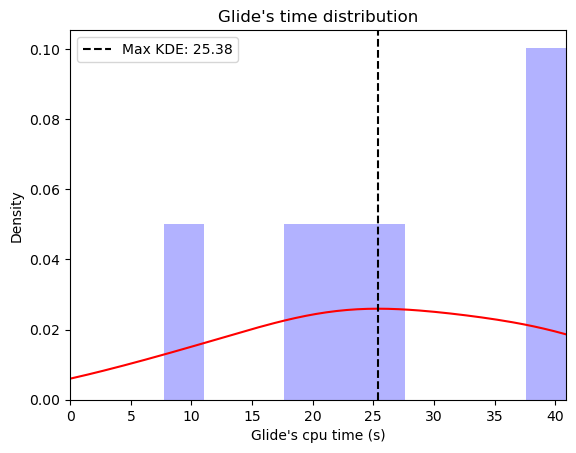

In [5]:
experimental_data_path = 'original_input/dataset_ki.csv'

# We generate a DockingAnalyzer object
analysis = pelevs.dockingAnalysis.DockingAnalyzer()

# We use the method glideAnalysis to obtain some information about the docking
analysis.glideAnalysis(experimental_data_path,'dG')

---

Now that we have docked the ligands and we have analyzed the results, we are ready to prepare the PELE simulations.

# 3. PELE simulations

Here we have a variety of possibilities to launch the PELE simulation from which to choose. In this example we will only make one specific case.

We will make a simulation with: 'long' protocol, opls forcefield (default), truncated protocol (default), and perturbation set to induced fit (default).


---

In [6]:
# Initiallize the object
pele = pelevs.peleJob.PELEJob()

In [7]:
# Generating a long protocol simulation
pele.setGlideToPELESimulation(rescoring_method='long')

 - Sampling chosen: long.
 - Jobs will be stored at: 4_pele_simulation/pele_simulation/long
 - Splitting the outputted maegz file into individual pdbs.
 - Only the best tautomer/stereoisomer is saved.
 - Merging the 6 ligands to the receptor...
 - Generating yaml and run files.
 - Job created to run at MN4.
 - Send pele_simulation_folder to perform the simulations and run:
   bash general_runner.sh.


In [8]:
pele.PELEDownloader()

 - Run:
   bash download_files.sh
   After PELE simulations have been performed.


---

In this last snippet of code we use the PELEDownloader() method to generate two files that we will use once the simulations are finished.

The next step would be to, again, put everything in a tar and send it to mn4.

```tar -cvf simulation.tar pele_simulation pele_downloader.py download_files.sh```

Once the simulations are complete you can run 

```bash download_files.sh```

and download the folder generated (it will be the name of the docking software used, i.e. glide). You should download the data in the working directory. Now we are ready to analyze the PELE simulations.

## 4. PELE Analysis

### 4.1. PELE correlations

---

In [17]:
# Initializing object
analysis = pelevs.PELEAnalyzer()

In [18]:
# Collecting all data
analysis.PELEDataCollector()

 -     Experimental data found at 1_input_files/experimental_energies/dataset_ki.csv


In [4]:
# Assigning data frame to a variable and showing its content
df_long = analysis.all_data
analysis.all_data

,docking_tool,forcefield,protein_part,perturbation,sampling,system,be_min,be_bz,be_p5,be_p10,...,te_p5,te_p10,te_p25,sasa_min,sasa_bz,sasa_av,sasa_max,rmsd_max,rmsd_av,dG
0,glide,opls,truncated,refinement,long,0,-65.3665,-47.297798,-61.89440,-61.89440,...,-2035.510,-2035.510,797085.75,0.040631,0.149236,0.149073,0.338160,10.74410,6.261012,-14.347109
1,glide,opls,truncated,refinement,long,1,-70.4529,-64.509500,-70.44390,-63.78000,...,-2510.660,743217.200,746038.00,0.003031,0.052060,0.046643,0.096511,9.12289,5.010004,-13.751713
2,glide,opls,truncated,refinement,long,2,-62.6469,-62.326800,-62.64690,-62.64690,...,-2254.040,-2254.040,794135.00,0.049526,0.049585,0.080076,0.142923,5.63240,2.511796,-12.983688
3,glide,opls,truncated,refinement,long,3,-62.9255,-57.125496,-62.92550,-56.68366,...,-2357.200,681596.600,683746.50,0.000000,0.008945,0.020612,0.064073,8.07520,4.520673,-12.892411
4,glide,opls,truncated,refinement,long,4,-82.7593,-69.237958,-72.99010,-71.25650,...,-2293.046,-2281.026,608812.00,0.027225,0.043100,0.043893,0.103965,6.31608,3.175404,-12.813344
5,glide,opls,truncated,refinement,long,5,-78.9437,-58.111525,-65.36656,-63.06024,...,-2479.770,-2479.770,620282.00,0.002052,0.018922,0.022438,0.095548,9.73850,3.511102,-12.798723


In [5]:
# Scores retrieved from the simulations
df_long.columns

Index(['docking_tool', 'forcefield', 'protein_part', 'perturbation',
       'sampling', 'system', 'be_min', 'be_bz', 'be_p5', 'be_p10', 'be_p25',
       'te_min', 'te_bz', 'te_p5', 'te_p10', 'te_p25', 'sasa_min', 'sasa_bz',
       'sasa_av', 'sasa_max', 'rmsd_max', 'rmsd_av', 'dG'],
      dtype='object')

---

Here we have retrieved all the daa of the simulation and we now can proceed to make some plots and see how it went.
We are going to correlate different scores like the Binding Energy minimum (be_min) or the Boltzmann weighted Binding Energy (be_bz).

---

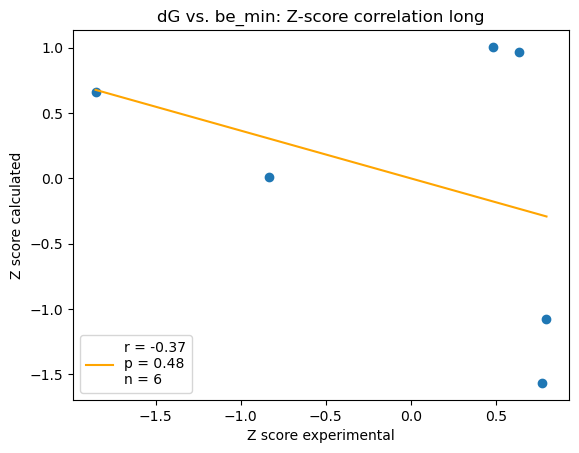

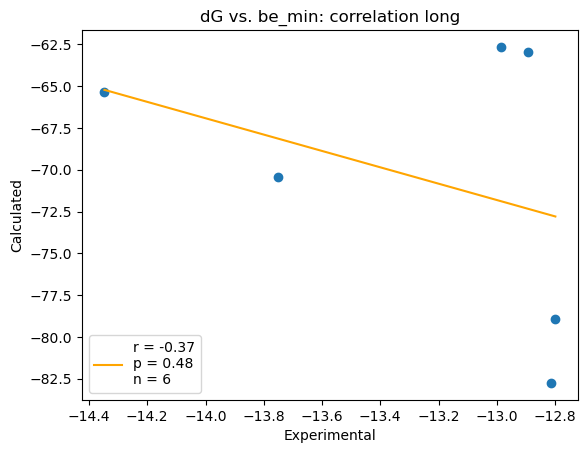

In [12]:
analysis.correlationPlotter('dG', 'be_min', 'long', df=df_long)

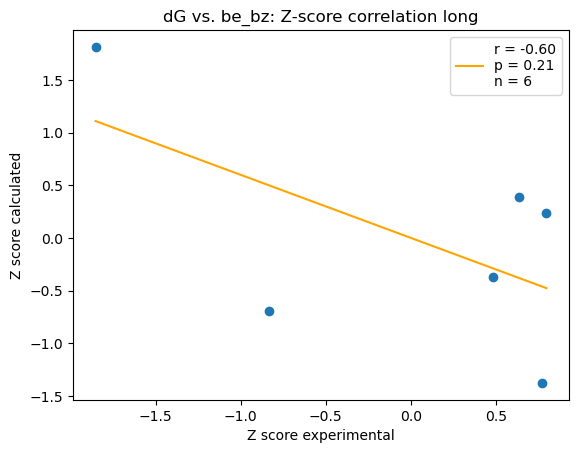

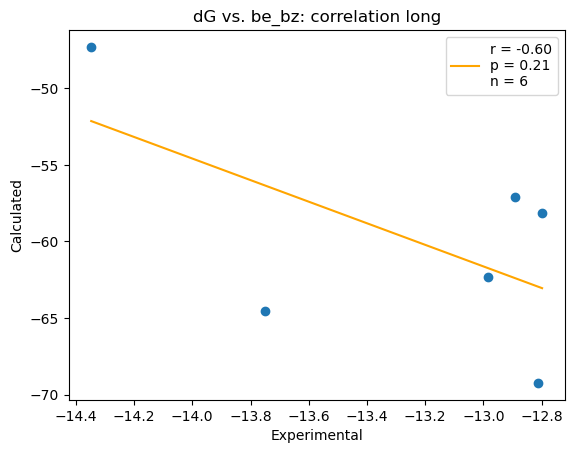

In [13]:
analysis.correlationPlotter('dG', 'be_bz', 'long', df=df_long)

---

We can also subsample the data in case you want to see how the results of an short sampling would be. Obviously, we can only **sub**sample which means that we cannot ask for xlong data when we have only done a long simulation. 

In this case we will see how would the 'short' results be.

---

In [14]:
# Collecting part (subsample = short) of the data
analysis.PELEDataCollector(sample='short')

 -     Experimental data found at 1_input_files/experimental_energies/dataset_ki.csv
 -     Subsampling of the simulation successful: from long to short.


In [15]:
# Assigning data frame to a variable and showing its content
df_short = analysis.all_data
analysis.all_data

,docking_tool,forcefield,protein_part,perturbation,sampling,system,be_min,be_bz,be_p5,be_p10,...,te_p5,te_p10,te_p25,sasa_min,sasa_bz,sasa_av,sasa_max,rmsd_max,rmsd_av,dG
0,glide,opls,truncated,refinement,short,0,-65.3665,-47.297800,-62.882525,-61.89440,...,-2061.3665,-2053.473,-2043.780,0.044885,0.149236,0.076443,0.239425,6.691190,1.801082,-14.347109
1,glide,opls,truncated,refinement,short,1,-70.4439,-64.783820,-70.443900,-70.44390,...,-2511.1700,-2510.660,-2510.660,0.054529,0.054579,0.054798,0.054815,1.447450,0.666189,-13.751713
2,glide,opls,truncated,refinement,short,2,-62.3268,-62.326800,-62.326800,-62.32680,...,-2254.0400,-2254.040,-2254.040,0.049585,0.049585,0.049585,0.049585,0.454132,0.454132,-12.983688
3,glide,opls,truncated,refinement,short,3,-62.9255,-56.465211,-62.925500,-62.92550,...,-2358.9900,-2357.386,-2357.200,0.005620,0.005620,0.030504,0.033886,4.145590,1.062350,-12.892411
4,glide,opls,truncated,refinement,short,4,-82.7593,-69.905231,-80.746860,-71.96765,...,-2295.0790,-2294.800,-2284.075,0.027225,0.041100,0.034749,0.049051,4.942680,0.757358,-12.813344
5,glide,opls,truncated,refinement,short,5,-63.0073,-62.472155,-60.555445,-60.35188,...,-2489.6900,-2487.157,-2479.770,0.013798,0.018010,0.017344,0.019098,2.286320,1.031506,-12.798723


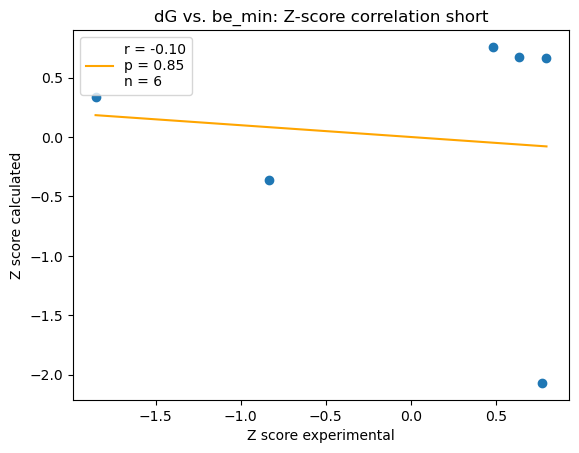

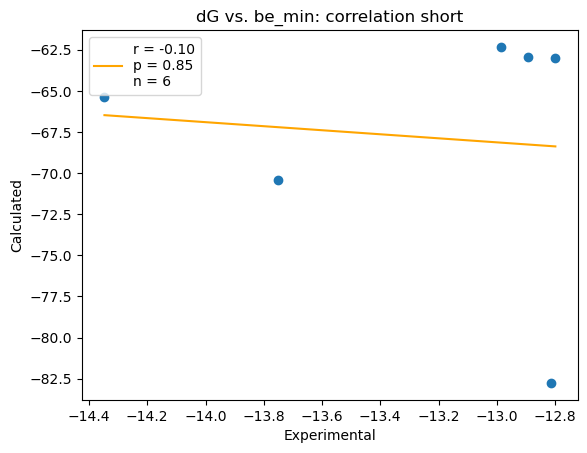

In [16]:
analysis.correlationPlotter('dG', 'be_min', 'short', df=df_short)

---

### 4.2. PELE individual simulation analysis

In case you want to check individually a single simulation of a ertain ligand with a certain protocol you can use another method implemented in the class:

---

 - Analyzing the simulation in 
	5_pele_analysis/simulations/glide/long/0


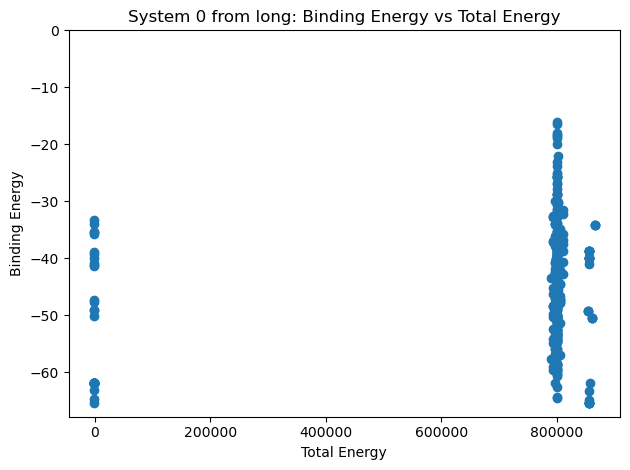

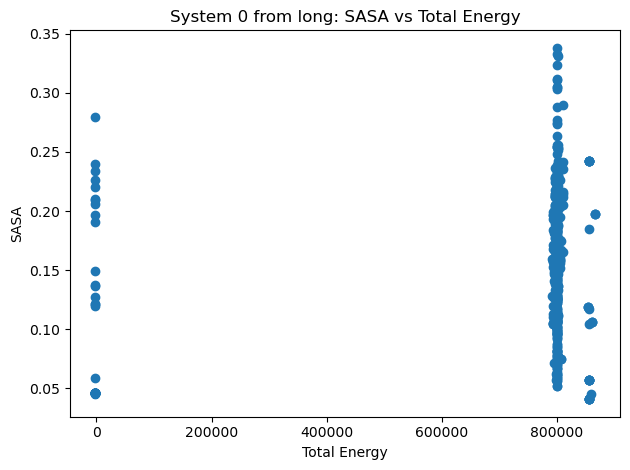

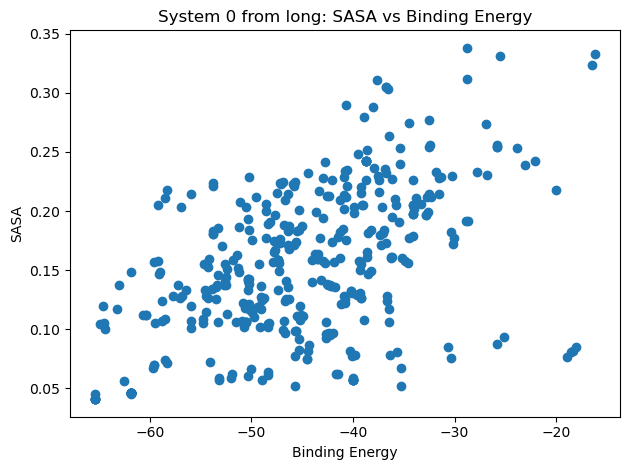

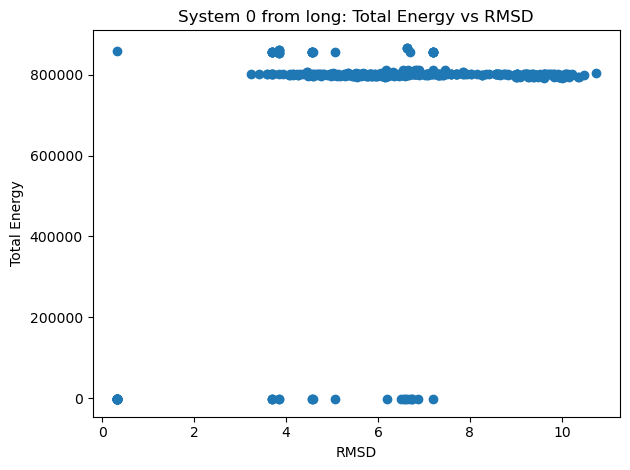

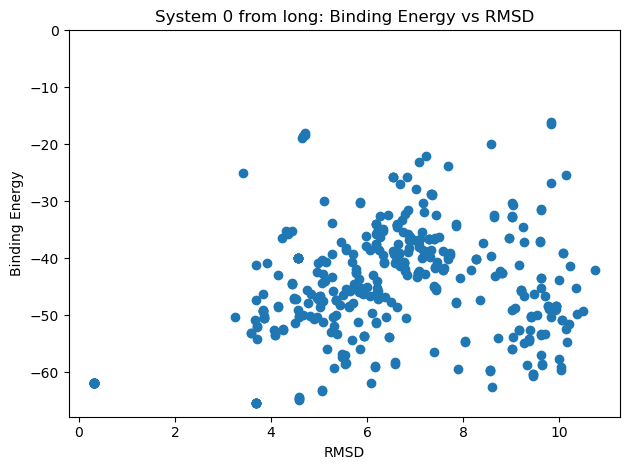

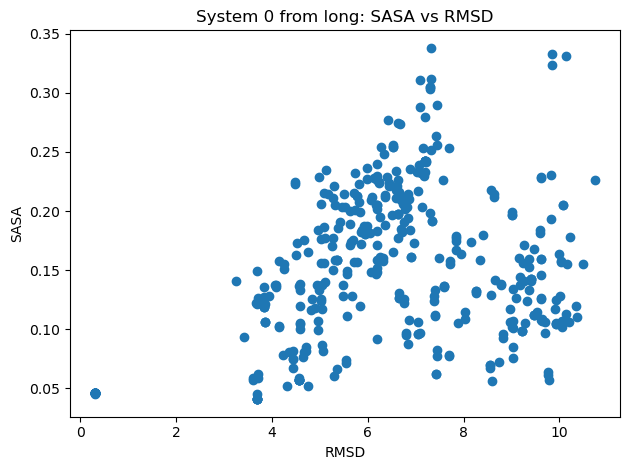

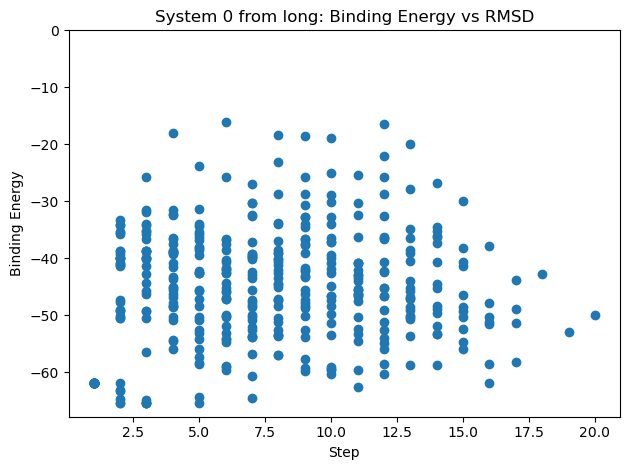

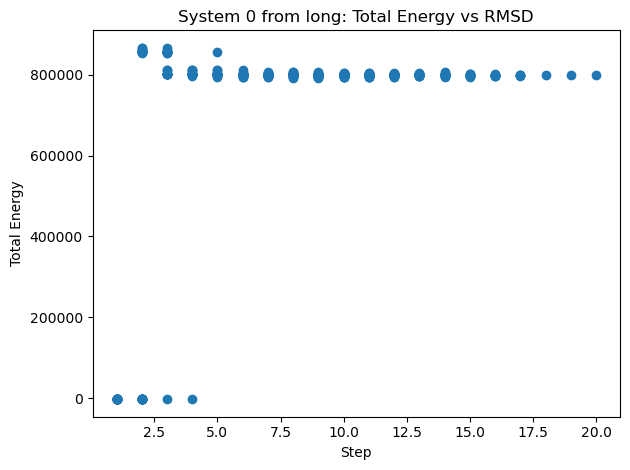

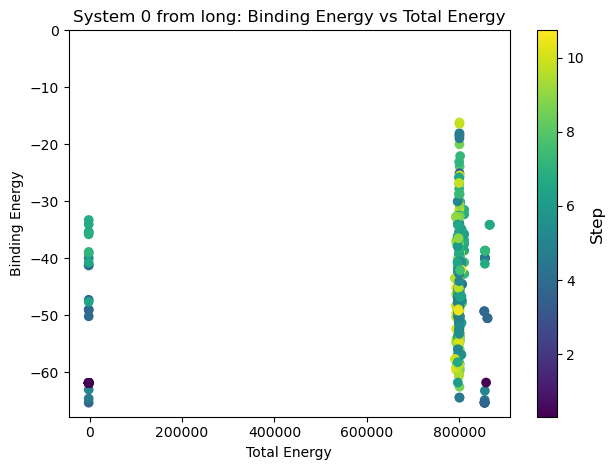

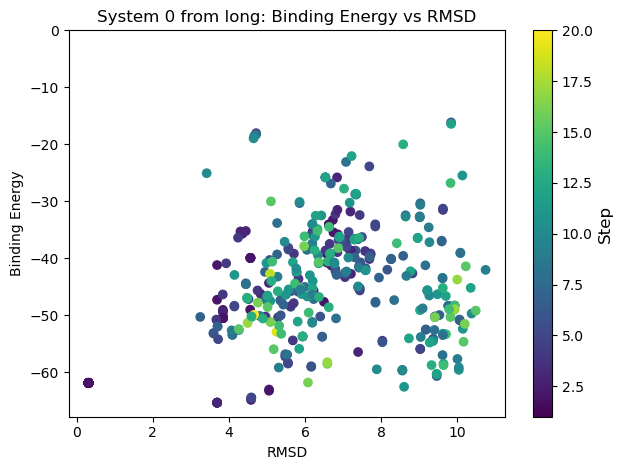

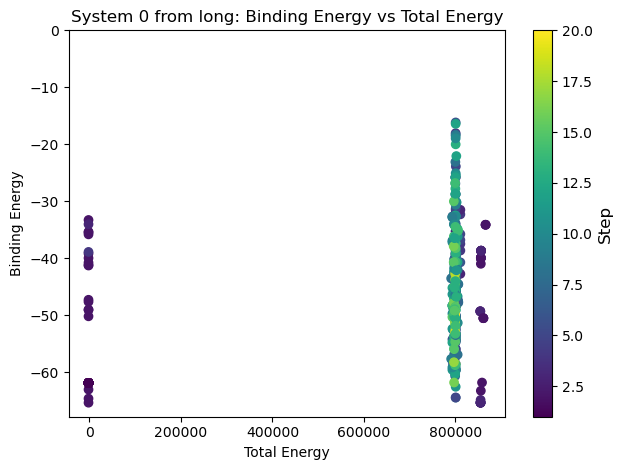

 - Storing images at 5_pele_analysis/analysis/long/0


In [21]:
analysis.simulationAnalyzer(['long'], '0')

---

In this example we can see that there are issues with the total energy but it is enough to understand how it works. All the images generated are saved in 5_pele_analysis/analysis.



## QM charges

If you require RESP calculated charges for a ligand to have a more precise simulation there is a method in inputPrepare class that can help.

---

In [2]:
ligand = pelevs.inputPrepare.InputPreparation('3_docking_job/job/output_pdb_files/3.pdb')
ligand.setUpQMParametrization()

 -     Ligand file is already in 1_input_files/ligands.
 -     Setting up a qm parametrization job at: 1_input_files/qm/3/qm_job.
 -     Ligand to parametrize: 3.
 -     Send job to local machine (cactus, bubbles, blossom) to send job.


---

This method generates a pipeline that first optimizes the geometry of the ligand with 10 iterations, calculates the RESP charges and prepares the folders to have the final result all in one place.

The final folder is thought to use peleffy in the MN4 machine. It will generate a DataLocal foder that you cn then copy to the job you are interested in.